# Clustering : K-Means

## k-means method demo
Website แสดง visualization ของ k-means โดย Naftali Harris here:

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) 
        

## K-Means with SciKit Learn

รายละเอียดเพิ่มเติมของการใช้ SciKit Learn ดูได้ที่ http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [1]:
import numpy as np


from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


### ตัวอย่างที่ 1

In [2]:
from sklearn.datasets import make_blobs, load_iris # เรียกใช้้ข้อมูลที่มากับ SciKit Learn

In [3]:
# ใหโปรแกรมสร้างข้อมูลตัวอย่างเริ่มต้น 500 ชุด โดยกำหนดให้จุดกลางมี 3 จุด 
n_samples = 5000
#random_state = 170

#สร้าง matrix X ที่มีขนาด 500 แถว และ 2 คอลัมน์ (แต่ละคอลัมน์คือ feature นั่นคือ X)
#y_num คือ label มีจำนวน 500 ข้อมูล แต่ละค่าเป็นตัวบอกว่าข้อมูลอยู่กลุ่มไหน
X,y_num = make_blobs(n_samples=n_samples, centers=3, random_state=50)


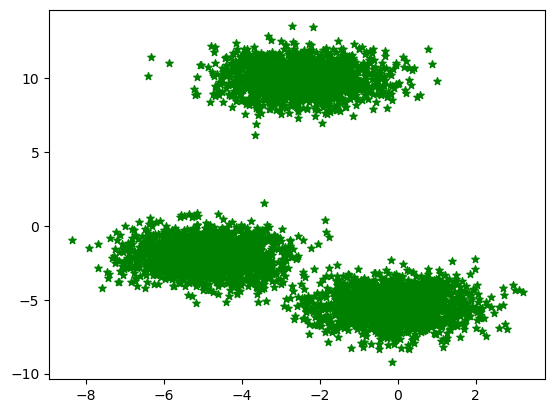

In [4]:
# plot data
plt.scatter(X[:, 0], X[:,1], s=30, color= 'green', marker="*") #เอา X มา plot, # s คือขนาดของข้อมูลแต่ละจุด
 
#print(X[:,0])  #x[row,column] ทุกแถวของ column แรก
#print(X[1,:])

## การเลือก k ที่เป็นจำนวนกลุ่มใน k-means ว่าควรจะเลือก k เป็นเท่าไร 

### หาค่า SSE เพื่อดูว่าค่า K ที่น้อยที่สุดที่ทำให้ค่า SSE ลดลงมากที่สุดจนกระทั้งมีการเปลี่ยนแปลงน้อยมาก หากนำค่า SSE ได้รูปกราฟที่เป็นลักษณะข้อศอก จึงเรียกว่า elblow method

Text(0, 0.5, 'Sum of Squared Errors')

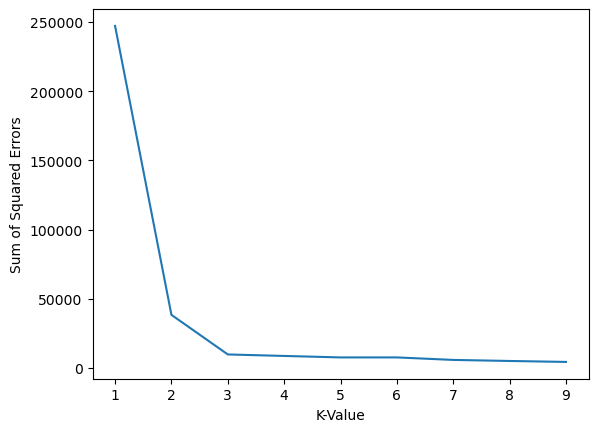

In [5]:
k = range(1,10)
sum_squared_errors = []

for i in k:
  model = KMeans(n_clusters = i)
  model.fit_predict(X)
  sum_squared_errors.append(model.inertia_)

plt.plot(k,sum_squared_errors)
plt.xlabel('K-Value')
plt.ylabel('Sum of Squared Errors')

1 247083.7495480301
2 38441.76608285415
3 9848.056539273915
4 8752.017986570143
5 7679.7797474863655
6 6603.920387729154
7 5866.975454118662
8 5145.562412159092
9 4858.050021381383


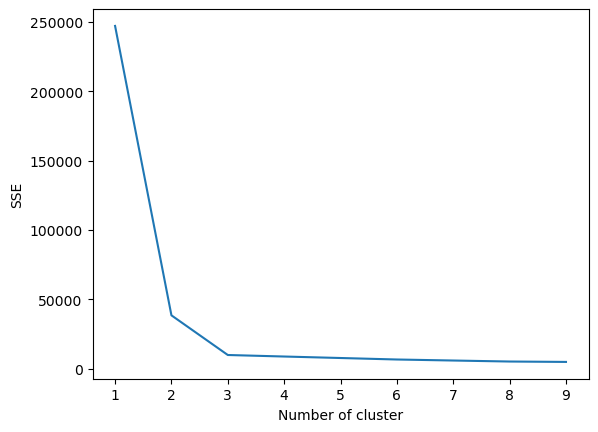

In [6]:
sse = {}
for k in range(1, 10): #ทำทั้งหมด 9 รอบ
     k_means = KMeans(n_clusters = k, init = 'random', max_iter=300)
     k_means.fit(X)
     sse[k] = k_means.inertia_   # Inertia: Sum of distances of samples to their closest cluster center   
     print(k,sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

ถึงตอนนี้ให้ scikit-learn สร้าง k-means โดยมี parameters ดังนี้
* `n_clusters`: $k=3$ clusters
* `init`: random initialization เป็นค่า random
* `max_iter`: 

เมื่อจัดกลุ่มแล้วให้ plot กลุ่ม cluster

In [7]:
#ใช้ K-means clustering algorithm
k_means = KMeans(n_clusters=3, init='random', max_iter=300)
k_means.fit(X)  # fit model

KMeans(init='random', n_clusters=3)

In [8]:
# Predict the cluster for all the samples
cluster = k_means.predict(X)
cluster_label = k_means.labels_


[[-0.08269741 -5.42569363]
 [-4.87272793 -2.05505601]
 [-2.47009018  9.9641976 ]]


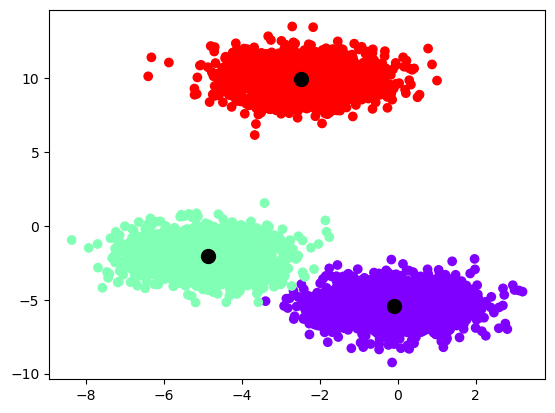

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_label, marker="o",cmap='rainbow')
centers = k_means.cluster_centers_
print(centers) #พิมพ์จุดกลาง
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)

# ตัวอย่างที่ 2 IRIS 

In [10]:
iris = load_iris()
X = iris.data[:,:]
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [11]:
iris_label = iris.target
print(iris_label) #print ข้อมูลในแต่ละกลุ่มออกมา


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


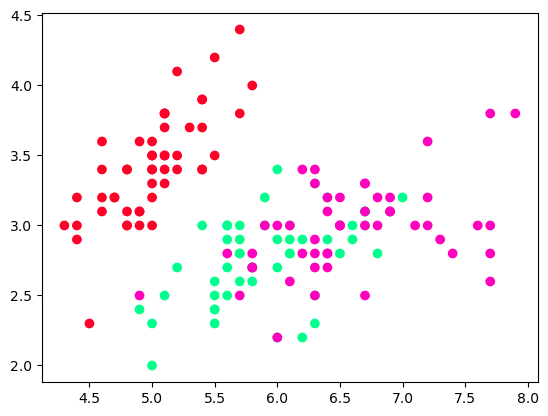

In [12]:
plt.scatter(X[:,0], X[:,1], c=iris_label, cmap='gist_rainbow')

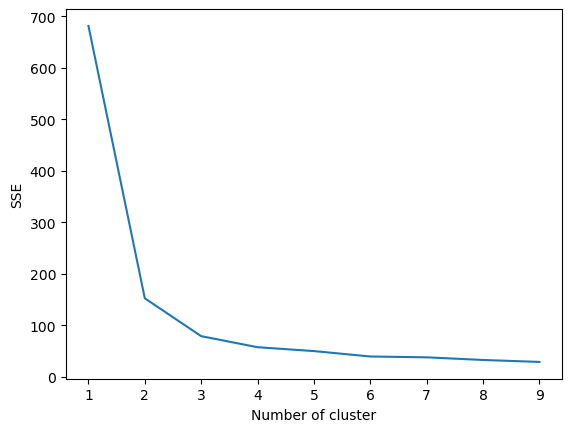

In [13]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [14]:
iris_kmeans = KMeans(n_clusters=3, max_iter=1000).fit(X)
iris_cluster = kmeans.fit_predict(X)
iris_cluster_label = iris_kmeans.labels_
print(iris_cluster_label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


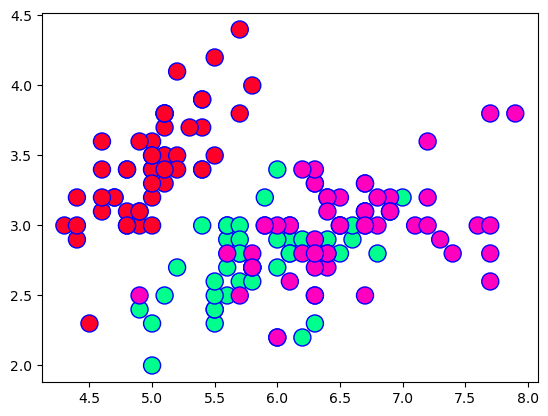

In [15]:
plt.scatter(X[:,0], X[:,1], c=iris_label, cmap='gist_rainbow', edgecolor='b', s=150)

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


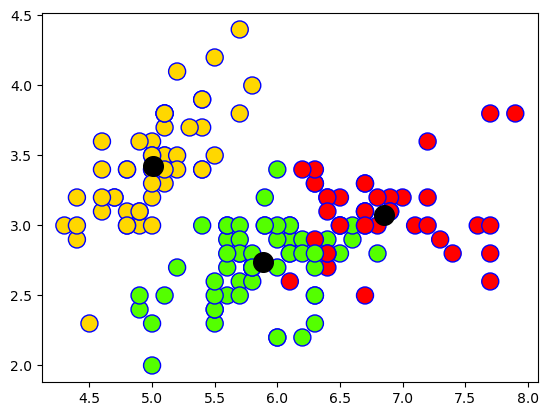

In [16]:
plt.scatter(X[:,0], X[:,1], c=iris_cluster_label, cmap='prism', edgecolor='b', s=150)
centers = iris_kmeans.cluster_centers_
print(centers) #พิมพ์จุดกลาง
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)